In [13]:
import torch
import numpy as np
import random
import torch.nn as nn
import matplotlib.pyplot as plt

In [14]:
def seedTest (seed):

    # Put the seed
    torch.manual_seed(seed) 
    
    # build the model
    model = nn.Sequential(
        nn.Linear(2, 8),   # input layer
        nn.Linear(8, 1),   # output layer
    )
    
    # init avec Xavier pour les poids (tu peux laisser les biais par défaut)
    for name, param in model.named_parameters():
        if 'weight' in name:
            nn.init.xavier_normal_(param.data)
    
    return model
    

In [15]:
# Compute seed
no_r = 4
r_1 = random.randint(0, 2**32 - 1)
r_2 = random.randint(0, 2**31 - 1)

In [16]:
# Create Model 
net_noseed = seedTest(no_r)
net_rs1a = seedTest(r_1)
net_rs2 = seedTest(no_r)
net_rs1b = seedTest(r_1)

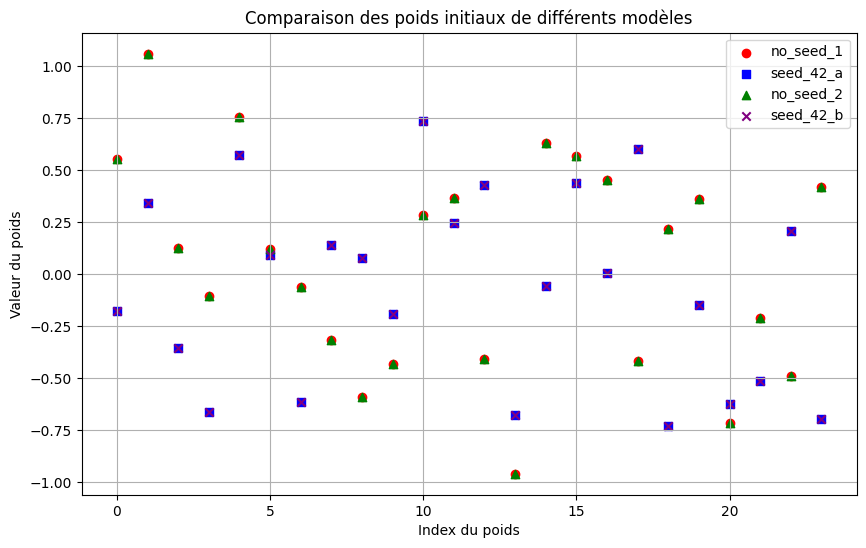

In [17]:
# Plot the weight Values
models = {
    'no_seed_1': net_noseed,
    'seed_42_a': net_rs1a,
    'no_seed_2': net_rs2,
    'seed_42_b': net_rs1b,
}

weights_data = {}

for name, model in models.items():
    weights = []
    for param in model.parameters():
        if param.requires_grad and len(param.shape) > 1:  
            weights.extend(param.data.flatten().numpy())
    weights_data[name] = np.array(weights)

# Plot
plt.figure(figsize=(10, 6))

markers = ['o', 's', '^', 'x']
colors = ['red', 'blue', 'green', 'purple']

for i, (name, weights) in enumerate(weights_data.items()):
    plt.scatter(range(len(weights)), weights, label=name, marker=markers[i], color=colors[i])

plt.xlabel("Index du poids")
plt.ylabel("Valeur du poids")
plt.title("Comparaison des poids initiaux de différents modèles")
plt.legend()
plt.grid(True)
plt.show()